## Softeer GBC
문제 page: https://softeer.ai/practice/info.do?eventIdx=1&psProblemId=584 <br>
문제의 주어진 예시 상황을 도식화 해보면 아래와 같다.

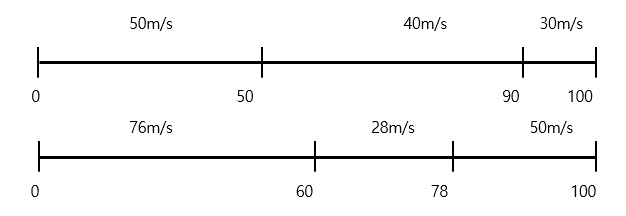

In [4]:
from IPython.display import Image
Image('GBC1.png')

둘의 속도를 비교하기 위해 그래프를 합쳐보자

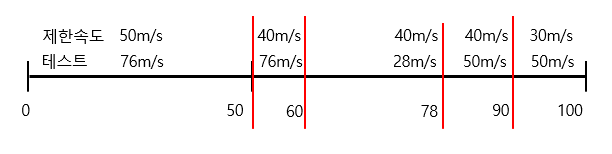

In [5]:
from IPython.display import Image
Image('GBC2.png')

그림을 통해 각 구간마다 (제한속도 - 테스트 속도)의 값이 가장 큰 값을 갱신해주면 문제를 해결할 수 있다는 것을 알 수 있다.<br>
구간을 나누기 위해 구간과 속도를 list 자료형으로 담아내자<br>
제한속도의 구간 = [0, 50, 90, 100]<br>
제한속도 = [50, 40, 30]<br>
```python
limit_dist = [0]
limit_v = []
for i in range(N):
    dist, v = [int(x) for x in input().split()]
    limit_dist.append(dist+limit_dist[i])
    limit_v.append(v)

# 마찬가지로 test의 구간, 속도를 list 자료형으로 담아내자

test_dist = [0]
test_v = []
for i in range(M):
    dist , v = [int(x) for x in input().split()]
    test_dist.append(dist+test_dist[i])
    test_v.append(v)
```

이제 각각의 경우에 따라<br>
(test_v[i] - limit_v[i])를 구해 이들의 최대값을 print하면 된다.<br>
이중 반복문(i: test, j: limit)를 통해 구현할 수 있을 것 같다.<br>
여기서 문제는 test의 구간이 limit의 구간에 속하는지 어떻게 아는 것인가? 이다.

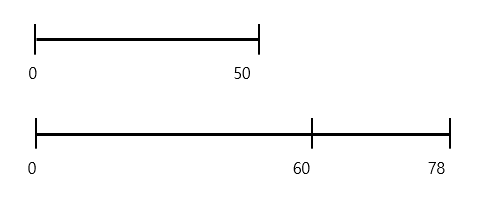

In [9]:
from IPython.display import Image
Image('GBC3.png')

0부터 50은 0부터 60까지 속하지만 60부터 78까지에는 속하지 않는다.
이들을 비교할 수 있는 방안으로 구간의 양 끝을 비교하면 될 것 같다
먼저 구간에 속하는 경우는 다음 3가지
1. 왼쪽에 걸치는 경우
2. 가운데에 속하는 경우
3. 오른쪽에 걸치는 경우
로 나눌 수 있다

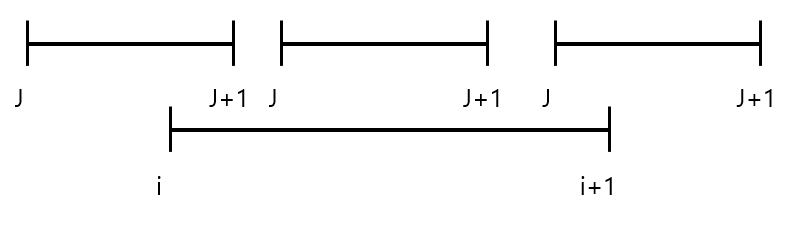

In [6]:
from IPython.display import Image
Image('GBC4.png')

하지만 이 3가지 경우를 수식화하기에는 다소 복잡해 보인다.
그러면 구간에 속하지 않는 경우는 어떤 경우가 있을까?

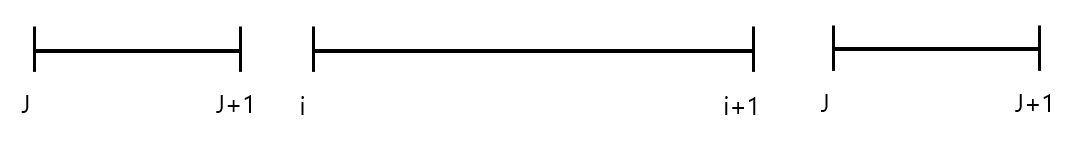

In [8]:
from IPython.display import Image
Image('GBC5.png')

1. 구간의 왼쪽에 존재
2. 구간의 오른쪽에 존재
즉.
``` python
(limit_dist[j+1] <= test_dist[i])  or  (test_dist[i+1] <= limit_dist[j])
```
# 등호가 들어간다는 점에 주목하자

## 해답

In [ ]:
N, M = [int(x) for x in input().split()]

limit_dist = [0]
limit_v = []
for i in range(N):
    dist, v = [int(x) for x in input().split()]
    limit_dist.append(dist+limit_dist[i])
    limit_v.append(v)
    

test_dist = [0]
test_v = []
for i in range(M):
    dist , v = [int(x) for x in input().split()]
    test_dist.append(dist+test_dist[i])
    test_v.append(v)


result = []
for i in range(M):
    for j in range(N):
        if limit_dist[j+1]  <= test_dist[i]: # test가 limit보다 오른쪽에 있는 경우
            continue 
        elif test_dist[i+1] <= limit_dist[j]: # test가 limit보다 왼쪽에 있는 경우
            continue
        else:

            result.append(test_v[i] - limit_v[j]) 
            

max_v = max(result)
print(max(max_v, 0))